In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
md = pd.read_csv("50_Startups.csv")
md.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
md.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [6]:
dummy = pd.get_dummies(md.State, drop_first = True)
dummy.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [8]:
md = pd.concat([md, dummy], axis =1)

In [9]:
md.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [13]:
md.drop(['State'], axis = 1, inplace = True)
md.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [14]:
from sklearn.model_selection import train_test_split

In [26]:
md_train, md_test = train_test_split(md, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
md_train.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
25,64664.71,139553.16,137962.62,107404.34,0,0
26,75328.87,144135.98,134050.07,105733.54,1,0
35,46014.02,85047.44,205517.64,96479.51,0,1
17,94657.16,145077.58,282574.31,125370.37,0,1
7,130298.13,145530.06,323876.68,155752.60,1,0


In [28]:
md_train.corr()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
R&D Spend,1.000000,0.216762,0.696969,0.979801,0.160423,0.035454
Administration,0.216762,1.000000,0.003512,0.190953,-0.180073,0.033361
Marketing Spend,0.696969,0.003512,1.000000,0.723772,0.262977,-0.086350
Profit,0.979801,0.190953,0.723772,1.000000,0.166971,-0.018189
Florida,0.160423,-0.180073,0.262977,0.166971,1.000000,-0.521739
New York,0.035454,0.033361,-0.086350,-0.018189,-0.521739,1.000000


<AxesSubplot:>

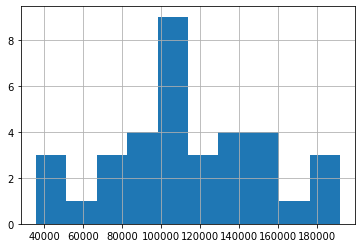

In [33]:
md_train["Profit"].hist()

In [34]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
md_train[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']] = scaler.fit_transform(md_train[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']])

In [37]:
md_train.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
25,-0.314256,0.576033,-0.661057,-0.200626,0,0
26,-0.063435,0.755241,-0.693737,-0.244683,1,0
35,-0.752919,-1.555379,-0.096801,-0.488705,0,1
17,0.391165,0.792062,0.546818,0.273124,0,1
7,1.229439,0.809756,0.891798,1.074279,1,0


In [38]:
y_train = md_train.pop("Profit")
X_train = md_train

In [39]:
y_train.head()

25   -0.200626
26   -0.244683
35   -0.488705
17    0.273124
7     1.074279
Name: Profit, dtype: float64

In [40]:
X_train.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
25,-0.314256,0.576033,-0.661057,0,0
26,-0.063435,0.755241,-0.693737,1,0
35,-0.752919,-1.555379,-0.096801,0,1
17,0.391165,0.792062,0.546818,0,1
7,1.229439,0.809756,0.891798,1,0


In [41]:
import statsmodels.api as sm

In [42]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train)
X_train_lm1.head()

,const,R&D Spend,Administration,Marketing Spend,Florida,New York
25,1.0,-0.314256,0.576033,-0.661057,0,0
26,1.0,-0.063435,0.755241,-0.693737,1,0
35,1.0,-0.752919,-1.555379,-0.096801,0,1
17,1.0,0.391165,0.792062,0.546818,0,1
7,1.0,1.229439,0.809756,0.891798,1,0


In [43]:
# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm1).fit()

In [44]:
lr_1.params

const              0.077535
R&D Spend          0.942736
Administration    -0.018843
Marketing Spend    0.071874
Florida           -0.086616
New York          -0.139527
dtype: float64

In [45]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     167.1
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.87e-20
Time:                        21:22:59   Log-Likelihood:                 9.7478
No. Observations:                  35   AIC:                            -7.496
Df Residuals:                      29   BIC:                             1.837
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0775      0.062      1.241      0.225      -0.050       0.205
R&D Spend           0.9427      0.050     18.696      0.000       0.840       1.046
Administration     -0.0188      0.037     -0.515      0.610      -0.094       0.056
Marketing Spend     0.0719      0.049      1.455      0.156      -0.029       0.173
Florida            -0.0866      0.089     -0.971      0.340      -0.269       0.096
New York           -0.1395      0.086     -1.630      0.114      -0.315       0.036
==============================================================================
Omnibus:                        0.515   Durbin-Watson:                   2.640
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.388
Skew:                          -0.245   Prob(JB):                        0.824
Kurtosis:                       2.840   Cond. No.                         4.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""